# <span style="font-size: 40px; color: blue;"> Assignment DCPP-12410082 by Suraj Dwivedi </span>


In [4]:
#importing libraries
import numpy as np
import pandas as pd
import requests
from IPython.display import HTML
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

# <span style="font-size: 30px; color: brown;"> Question 1 (90 pts)</span>


## <span style="font-size: 20px; color: black;"> 1. Use the API documentation at https://random-data-api.com/documentation hosted by random-data- api.com to create a dataset with the endpoint “users”. The data should capture 5000 users. (The APIgives a maximum of 100 random user profiles in one shot. You will have to write a loop to generate 5000 profiles). Format the data into a data frame. (10 pts)

a prelim study of the API documentaion gives the following information
Parameters
* Base URI: https://random-data-api.com/api/v2/
* Use size=number to fetch an array of any resource.

In [9]:
#testing the link to get the response
random_data_api__users_response= requests.get("https://random-data-api.com/api/v2/users")

In [11]:
# We will start by checking if the communication was successful and we received the response
random_data_api__users_response.status_code

200

In [13]:
# We will now access the response headers
random_data_api__users_response.headers

{'Alt-Svc': 'h3=":443"; ma=2592000', 'Cache-Control': 'max-age=0, private, must-revalidate', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json; charset=utf-8', 'Etag': 'W/"a7204e024ea12eaf20cccae34a09d526"', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Server': 'Caddy', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains', 'Vary': 'Origin, Accept-Encoding', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': 'ce2a101f-5213-4012-afd9-ee18a43c2863', 'X-Runtime': '0.009048', 'X-Xss-Protection': '0', 'Date': 'Sat, 31 Aug 2024 10:23:48 GMT', 'Content-Length': '577'}

In [15]:
random_data_api__users_response.headers['Content-Type']

'application/json; charset=utf-8'

In [17]:
# The .content attribute will show the content as a byte literal
#random_data_api__users_response.content

In [19]:
# Returns the data in Unicode format i.e., readable format
#random_data_api__users_response.text

In [21]:
# For convenience and later storage as a dataframe, we will parse it into a json object
# We can use the json() method available with a response object
random_data_api__users_json = random_data_api__users_response.json()
random_data_api__users_json

{'id': 5333,
 'uid': 'de4c8a6c-bd8b-4509-9273-d2856c0d1f74',
 'password': 'SjKvhRIa0Q',
 'first_name': 'Gavin',
 'last_name': 'Schumm',
 'username': 'gavin.schumm',
 'email': 'gavin.schumm@email.com',
 'avatar': 'https://robohash.org/nequererumvelit.png?size=300x300&set=set1',
 'gender': 'Polygender',
 'phone_number': '+689 (173) 959-7844 x1694',
 'social_insurance_number': '378077879',
 'date_of_birth': '1969-09-06',
 'employment': {'title': 'Forward Liaison', 'key_skill': 'Proactive'},
 'address': {'city': 'Marcellehaven',
  'street_name': 'Marcelo Way',
  'street_address': '3902 Ulrike Gardens',
  'zip_code': '81267-6404',
  'state': 'Pennsylvania',
  'country': 'United States',
  'coordinates': {'lat': 45.283418764193414, 'lng': -175.25618593999602}},
 'credit_card': {'cc_number': '4975-8232-2234-6106'},
 'subscription': {'plan': 'Student',
  'status': 'Idle',
  'payment_method': 'Money transfer',
  'term': 'Full subscription'}}

In [23]:
#storing it as a dataframe by converting it into one
random_data_api__users_df = pd.DataFrame(random_data_api__users_json)

In [25]:
#checking the head of the dataframe
random_data_api__users_df.head(3)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription
title,5333,de4c8a6c-bd8b-4509-9273-d2856c0d1f74,SjKvhRIa0Q,Gavin,Schumm,gavin.schumm,gavin.schumm@email.com,https://robohash.org/nequererumvelit.png?size=...,Polygender,+689 (173) 959-7844 x1694,378077879,1969-09-06,Forward Liaison,NaN,NaN,NaN
key_skill,5333,de4c8a6c-bd8b-4509-9273-d2856c0d1f74,SjKvhRIa0Q,Gavin,Schumm,gavin.schumm,gavin.schumm@email.com,https://robohash.org/nequererumvelit.png?size=...,Polygender,+689 (173) 959-7844 x1694,378077879,1969-09-06,Proactive,NaN,NaN,NaN
city,5333,de4c8a6c-bd8b-4509-9273-d2856c0d1f74,SjKvhRIa0Q,Gavin,Schumm,gavin.schumm,gavin.schumm@email.com,https://robohash.org/nequererumvelit.png?size=...,Polygender,+689 (173) 959-7844 x1694,378077879,1969-09-06,NaN,Marcellehaven,NaN,NaN


In [27]:
# Examining the dataframe
random_data_api__users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, title to term
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       14 non-null     int64 
 1   uid                      14 non-null     object
 2   password                 14 non-null     object
 3   first_name               14 non-null     object
 4   last_name                14 non-null     object
 5   username                 14 non-null     object
 6   email                    14 non-null     object
 7   avatar                   14 non-null     object
 8   gender                   14 non-null     object
 9   phone_number             14 non-null     object
 10  social_insurance_number  14 non-null     object
 11  date_of_birth            14 non-null     object
 12  employment               2 non-null      object
 13  address                  7 non-null      object
 14  credit_card              1 non-null      ob

We observe that only 14 Data values are extracted not even 100 so according to documentation we need to add size to the url

* as per documentation of Random API Data
* Base URI: https://random-data-api.com/api/v2/

* Use size=number to fetch an array of any resource

In [30]:
# saving this as a csv file
random_data_api__users_df.to_csv('random_data_api__users.csv', index=False)

In [32]:
#defining batch size and building url accordingly
batch_size = 100

random_data_api__users_response = requests.get(f"{'https://random-data-api.com/api/v2/users'}?size={batch_size}")


In [34]:
# We will start by checking if the communication was successful and we received the response
random_data_api__users_response.status_code


200

In [36]:
# Defining BASE_URL
BASE_URL = "https://random-data-api.com/api/v2/users"

In [38]:
#Buliding function to loop through for 5000 users

def fetch_users(num_users, batch_size, sleep_time):
    all_users = []
    total_batches = num_users // batch_size + (1 if num_users % batch_size else 0)

    for i in range(total_batches):
        response = requests.get(f"{BASE_URL}?size={batch_size}")
        if response.status_code == 200:
            users = response.json()
            all_users.extend(users)
            print(f"Fetched {len(users)} users. Total fetched: {len(all_users)}")
        else:
            print(f"Failed to fetch data. Status code: {response.status_code}")
        
        # Only sleep if more users are needed
        if len(all_users) < num_users:
            sleep(sleep_time)  # Delay to avoid hitting rate limits

    return all_users[:num_users]

In [40]:
# for 5000 users
BASE_URL = "https://random-data-api.com/api/v2/users"
num_users = 5000
batch_size = 100
sleep_time = 1  # seconds

user_data = fetch_users(num_users, batch_size, sleep_time)


Fetched 100 users. Total fetched: 100
Fetched 100 users. Total fetched: 200
Fetched 100 users. Total fetched: 300
Fetched 100 users. Total fetched: 400
Fetched 100 users. Total fetched: 500
Fetched 100 users. Total fetched: 600
Fetched 100 users. Total fetched: 700
Fetched 100 users. Total fetched: 800
Fetched 100 users. Total fetched: 900
Fetched 100 users. Total fetched: 1000
Fetched 100 users. Total fetched: 1100
Fetched 100 users. Total fetched: 1200
Fetched 100 users. Total fetched: 1300
Fetched 100 users. Total fetched: 1400
Fetched 100 users. Total fetched: 1500
Fetched 100 users. Total fetched: 1600
Fetched 100 users. Total fetched: 1700
Fetched 100 users. Total fetched: 1800
Fetched 100 users. Total fetched: 1900
Fetched 100 users. Total fetched: 2000
Fetched 100 users. Total fetched: 2100
Fetched 100 users. Total fetched: 2200
Fetched 100 users. Total fetched: 2300
Fetched 100 users. Total fetched: 2400
Fetched 100 users. Total fetched: 2500
Fetched 100 users. Total fetched: 

In [535]:
# Converting to DataFrame and saving to csv

user_df = pd.DataFrame(user_data)
user_df.to_csv('random_data_api_users.csv', index=False)


In [536]:
user_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5000 non-null   int64 
 1   uid                      5000 non-null   object
 2   password                 5000 non-null   object
 3   first_name               5000 non-null   object
 4   last_name                5000 non-null   object
 5   username                 5000 non-null   object
 6   email                    5000 non-null   object
 7   avatar                   5000 non-null   object
 8   gender                   5000 non-null   object
 9   phone_number             5000 non-null   object
 10  social_insurance_number  5000 non-null   object
 11  date_of_birth            5000 non-null   object
 12  employment               5000 non-null   object
 13  address                  5000 non-null   object
 14  credit_card              5000 non-null  

In [537]:
user_df.head(3)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription
0,9328,cb546a3d-90da-4731-a727-c0ac639c471d,6cS18ihbxZ,Hermine,Osinski,hermine.osinski,hermine.osinski@email.com,https://robohash.org/velitoditconsequatur.png?...,Male,+255 (543) 691-0588,259227486,2002-01-22,"{'title': 'National Education Facilitator', 'k...","{'city': 'Klockoshire', 'street_name': 'Stehr ...",{'cc_number': '4872-9033-7332-9996'},"{'plan': 'Free Trial', 'status': 'Pending', 'p..."
1,7976,fff5132e-62a6-4fc3-93af-54060415267b,GPRK7lX1p4,Elizabeth,Dickens,elizabeth.dickens,elizabeth.dickens@email.com,https://robohash.org/consequunturinventorevolu...,Male,+1-345 567-365-8022 x62157,656382082,1982-11-07,"{'title': 'Dynamic Engineer', 'key_skill': 'Te...","{'city': 'New Richard', 'street_name': 'Glen P...",{'cc_number': '4220408593960'},"{'plan': 'Premium', 'status': 'Blocked', 'paym..."
2,6666,f380b7ef-7b94-4272-90aa-928004fffca3,VbBNDlmO4x,Rusty,Heidenreich,rusty.heidenreich,rusty.heidenreich@email.com,https://robohash.org/voluptatessedneque.png?si...,Female,+506 840-997-6826,659209548,1976-02-08,"{'title': 'Sales Architect', 'key_skill': 'Com...","{'city': 'Wolfmouth', 'street_name': 'Ortiz Br...",{'cc_number': '4978461529748'},"{'plan': 'Platinum', 'status': 'Pending', 'pay..."


## <span style="font-size: 20px; color: black;"> 2. Add a column to the dataframe that shows the current age of the user.

Age is needed here in terms of Year for which we need to take Date of Birth from the user_df and then calculate age by substracting from today

In [540]:
# defining function to calculate age
def age_function(dateofbirth):
    dateofbirth = pd.to_datetime(dateofbirth, format="%Y-%m-%d")
    today = pd.to_datetime("today")
    age = today.year - dateofbirth.year - ((today.month, today.day) < (dateofbirth.month, dateofbirth.day))
    return age

In [541]:
user_df['age'] = user_df['date_of_birth'].apply(age_function)

In [542]:
user_df.head(3)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription,age
0,9328,cb546a3d-90da-4731-a727-c0ac639c471d,6cS18ihbxZ,Hermine,Osinski,hermine.osinski,hermine.osinski@email.com,https://robohash.org/velitoditconsequatur.png?...,Male,+255 (543) 691-0588,259227486,2002-01-22,"{'title': 'National Education Facilitator', 'k...","{'city': 'Klockoshire', 'street_name': 'Stehr ...",{'cc_number': '4872-9033-7332-9996'},"{'plan': 'Free Trial', 'status': 'Pending', 'p...",22
1,7976,fff5132e-62a6-4fc3-93af-54060415267b,GPRK7lX1p4,Elizabeth,Dickens,elizabeth.dickens,elizabeth.dickens@email.com,https://robohash.org/consequunturinventorevolu...,Male,+1-345 567-365-8022 x62157,656382082,1982-11-07,"{'title': 'Dynamic Engineer', 'key_skill': 'Te...","{'city': 'New Richard', 'street_name': 'Glen P...",{'cc_number': '4220408593960'},"{'plan': 'Premium', 'status': 'Blocked', 'paym...",41
2,6666,f380b7ef-7b94-4272-90aa-928004fffca3,VbBNDlmO4x,Rusty,Heidenreich,rusty.heidenreich,rusty.heidenreich@email.com,https://robohash.org/voluptatessedneque.png?si...,Female,+506 840-997-6826,659209548,1976-02-08,"{'title': 'Sales Architect', 'key_skill': 'Com...","{'city': 'Wolfmouth', 'street_name': 'Ortiz Br...",{'cc_number': '4978461529748'},"{'plan': 'Platinum', 'status': 'Pending', 'pay...",48


In [543]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5000 non-null   int64 
 1   uid                      5000 non-null   object
 2   password                 5000 non-null   object
 3   first_name               5000 non-null   object
 4   last_name                5000 non-null   object
 5   username                 5000 non-null   object
 6   email                    5000 non-null   object
 7   avatar                   5000 non-null   object
 8   gender                   5000 non-null   object
 9   phone_number             5000 non-null   object
 10  social_insurance_number  5000 non-null   object
 11  date_of_birth            5000 non-null   object
 12  employment               5000 non-null   object
 13  address                  5000 non-null   object
 14  credit_card              5000 non-null  

## <span style="font-size: 20px; color: black;"> 3. Create a boxplot for age. Write your observations.

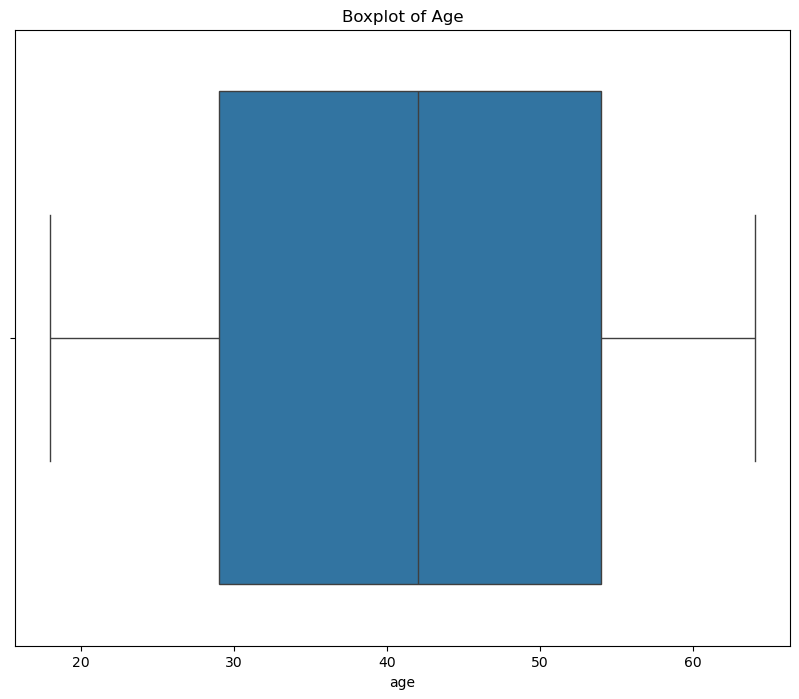

In [545]:
plt.figure(figsize=(10,8))
sns.boxplot(x=user_df['age'])
plt.title('Boxplot of Age')
plt.show()

In [546]:
# Extracting the boxplot statistics
stats = user_df['age'].describe()

In [547]:
stats

count    5000.000000
mean       41.334200
std        13.736719
min        18.000000
25%        29.000000
50%        42.000000
75%        54.000000
max        64.000000
Name: age, dtype: float64

In [548]:
iqr = stats['75%'] - stats['25%']
min_value = stats['min']
max_value = stats['max']
median = stats['50%']
q1 = stats['25%']
q3 = stats['75%']
outliers_low = user_df['age'][user_df['age'] < (q1 - 1.5 * iqr)]
outliers_high = user_df['age'][user_df['age'] > (q3 + 1.5 * iqr)]

print("Minimum Value:", min_value)
print("Q1 (25th Percentile):", q1)
print("Median (50th Percentile):", median)
print("Q3 (75th Percentile):", q3)
print("Maximum Value:", max_value)
print("Interquartile Range (IQR):", iqr)
print("Outliers Below Q1:", outliers_low)
print("Outliers Above Q3:", outliers_high)

Minimum Value: 18.0
Q1 (25th Percentile): 29.0
Median (50th Percentile): 42.0
Q3 (75th Percentile): 54.0
Maximum Value: 64.0
Interquartile Range (IQR): 25.0
Outliers Below Q1: Series([], Name: age, dtype: int64)
Outliers Above Q3: Series([], Name: age, dtype: int64)


observations are as follows:
* that there are no outliers below Q1 and Q3 and the data is uniformally distributed
* The size of the box and the length of the whiskers provide insights into the spread and variability of the data. A larger box and longer whiskers indicate greater variability
* The median line is centered in the box, and the whiskers are of approximately equal length

## <span style="font-size: 20px; color: black;"> 4. Create a plot that helps us evaluate the distribution of ages in the dataset. Note that the data here was randomly generated without any bias. What distribution would you expect for the distribution of age? Is your plot consistent with your expectation? Why or why not? (Note: You can use the slides from session 2 for guidance on the type of observations that can be made) (10 pts)

To understand the distribution we would be checking the Histogram first

Since the data for age was randomly generated without any bias, I am expecting the distribution to follow a normal distribution if it was generated from a process with a central tendency and random variation. This is because many natural phenomena and random processes tend to follow a normal distribution due to the Central Limit Theorem.


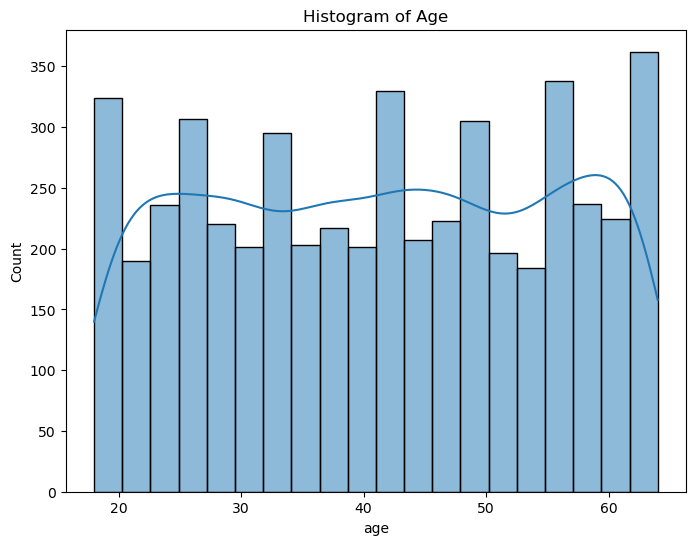

In [552]:
#histogram
plt.figure(figsize=(8,6))
sns.histplot(user_df['age'],kde=True,bins=20)
plt.title('Histogram of Age')
plt.show()

In [553]:
#checking the distrubution with the help of Q-Q Plot

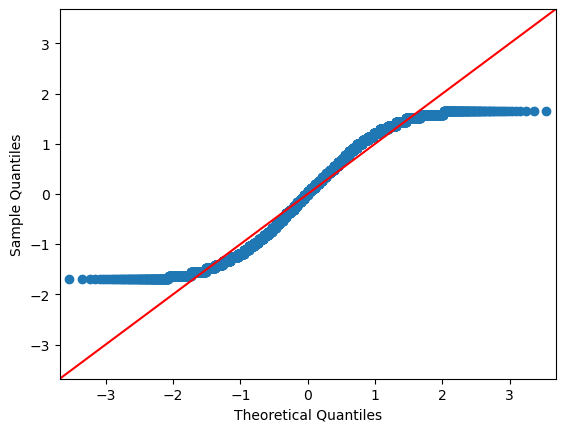

In [554]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

qqplot(user_df['age'], norm, fit = True, line='45');
plt.show()

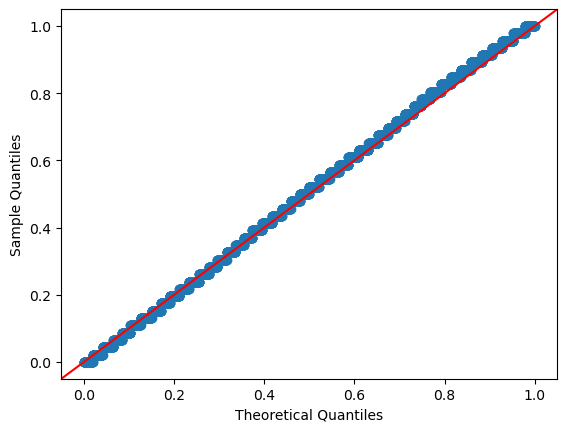

In [555]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

qqplot(user_df['age'], uniform, fit = True, line='45');
plt.show()

* so Q-Q plot validates that the distribution is Uniform Distribution which nullify our intital expectation of getting a normal distrubiton

## <span style="font-size: 20px; color: black;"> 5. Generate 5000 data points using the age column as follows: (i) Generate a random sample of 10 ages from the age column. Compute the mean. Store it in a list. (ii) Repeat for 5000 times and appendthe sample means to the list. Hint: You can use list comprehension to achieve this is in a single lineof code. (10pts)

### <span style="font-size: 20px; color: black;"> (i) Generate a random sample of 10 ages from the age column. Compute the mean. Store it in a list

In [559]:
# taking the vales of ages in an separate numpy array
ages = user_df['age'].values


In [560]:
type(ages)

numpy.ndarray

In [561]:
### Generate a random sample of 10 ages
sample = list(np.random.choice(ages, size=10, replace=False))

In [562]:
sample

[47, 25, 56, 45, 54, 39, 46, 59, 54, 64]

In [563]:
mean_sample=np.mean(sample)

In [564]:
mean_sample

48.9

In [565]:
type(mean_sample)

numpy.float64

In [566]:
mean_list=list()

In [567]:
mean_list=mean_sample

In [568]:
type(mean_list)

numpy.float64

In [569]:
mean_list

48.9

### <span style="font-size: 20px; color: black;"> (ii) Repeat for 5000 times and appendthe sample means to the list. Hint: You can use list comprehension to achieve this is in a single line of code. (10pts)

In [571]:
# Initializing an empty list to store sample means
sample_means = []

In [572]:
# Generating 5000 sample means
for i in range(5000):
    sample = np.random.choice(ages, size=10, replace=False)
    mean = np.mean(sample)
    sample_means.append(mean)

In [573]:
sample_means

[42.7,
 41.4,
 41.1,
 37.7,
 40.4,
 41.2,
 37.3,
 38.2,
 47.0,
 40.2,
 37.7,
 43.8,
 34.9,
 43.6,
 39.2,
 52.1,
 41.4,
 39.9,
 46.6,
 38.3,
 44.7,
 49.1,
 40.6,
 38.3,
 37.7,
 40.0,
 44.2,
 38.5,
 37.3,
 43.4,
 47.0,
 38.9,
 47.9,
 35.6,
 46.7,
 50.3,
 46.8,
 41.7,
 46.7,
 41.2,
 41.9,
 46.6,
 47.1,
 45.4,
 42.6,
 44.7,
 40.6,
 44.0,
 39.3,
 40.5,
 37.5,
 38.9,
 41.5,
 40.5,
 44.8,
 40.9,
 46.7,
 38.8,
 40.1,
 45.8,
 38.3,
 37.0,
 44.5,
 44.3,
 43.7,
 40.4,
 43.7,
 40.3,
 46.7,
 42.1,
 44.5,
 35.6,
 41.3,
 43.3,
 43.3,
 43.4,
 42.6,
 37.2,
 48.2,
 45.0,
 36.4,
 41.7,
 42.2,
 40.9,
 40.9,
 50.2,
 51.8,
 38.4,
 39.5,
 42.5,
 42.2,
 43.8,
 41.6,
 45.8,
 43.3,
 42.6,
 35.2,
 41.5,
 41.1,
 46.6,
 43.8,
 37.1,
 45.4,
 41.1,
 41.6,
 43.3,
 42.2,
 33.3,
 36.6,
 45.4,
 38.7,
 46.9,
 41.9,
 45.9,
 45.0,
 43.8,
 38.5,
 46.3,
 42.8,
 34.9,
 47.9,
 37.9,
 39.6,
 45.2,
 36.2,
 38.9,
 41.2,
 40.3,
 40.0,
 38.9,
 44.0,
 41.0,
 37.0,
 44.2,
 39.4,
 47.5,
 38.4,
 39.9,
 49.6,
 42.1,
 47.1,
 46.8,
 42.0,

In [574]:
type(sample_means)

list

In [575]:
len(sample_means)

5000

## 6. Plot a histogram of the sample means. How does the data seem to be distributed? Write your observations. (10pts)

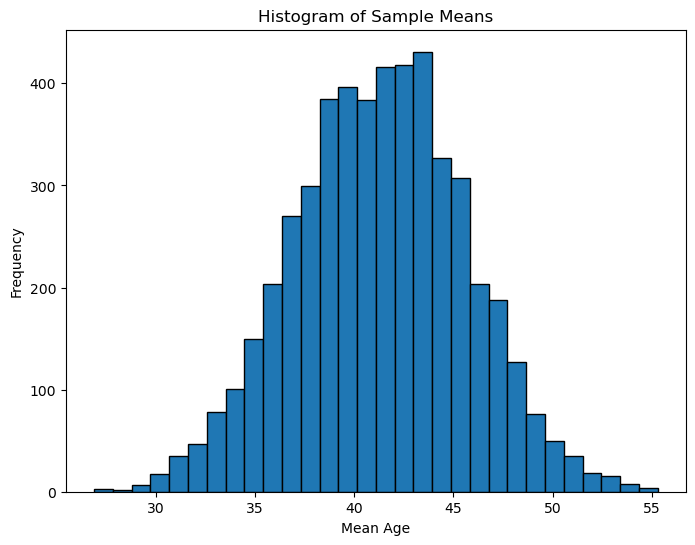

In [577]:
# Plot histogram of sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.show()

so the data seems to be normally distributed

## 7.Generate a Q-Q plot that plots the quantiles of the sample mean against those of a normal distribution.What are your observations and conclusions based on the plot?

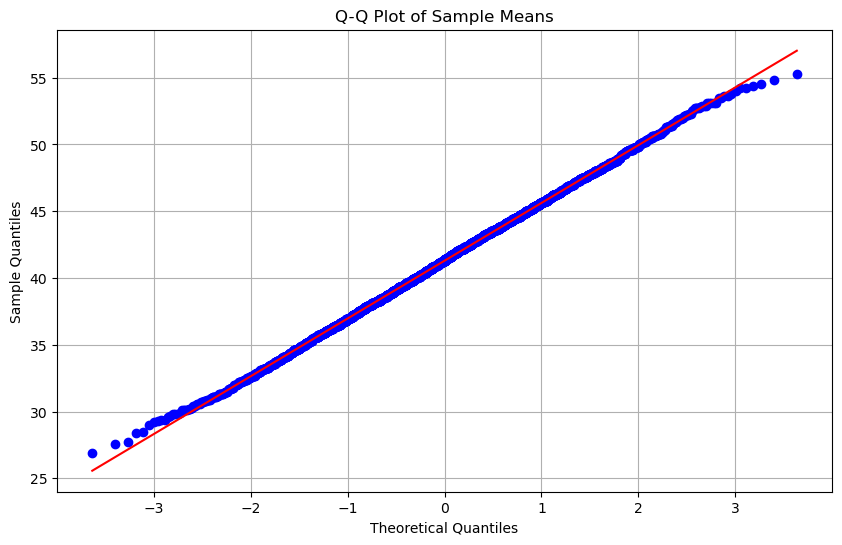

In [580]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sample Means')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

Observations and Conclusions
45-Degree Line: In a Q-Q plot, the 45-degree line serves as a reference.sample quantiles lie close to this line, it indicates that the sample distribution is similar to the theoretical distribution. in this case, normal distribution.

The closer the points are to the 45-degree line, the better the fit of the sample mean to a normal distribution.

In [582]:
# Convert the list of lists to a DataFrame
sample_mean_df = pd.DataFrame(sample_means, columns=['sample mean'])

In [583]:
sample_mean_df.head(3)

,sample mean
0,42.7
1,41.4
2,41.1


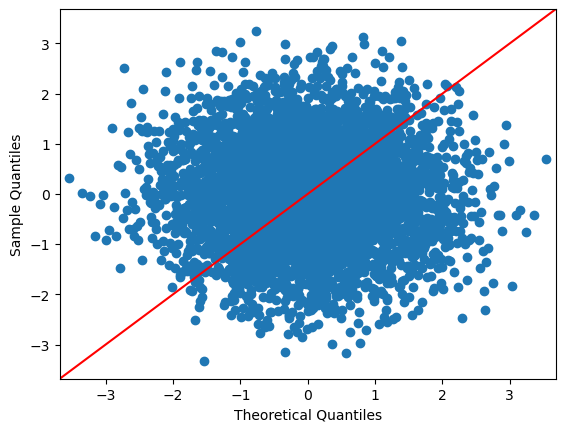

In [584]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

qqplot(sample_mean_df, norm, fit = True, line='45');
plt.show()

In [585]:
#So NORMAL DISTRIBUTION

## 8. Create a bar plot showing the number of users generated for each payment method. What do you observe? 

In [587]:
user_df.head(3)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription,age
0,9328,cb546a3d-90da-4731-a727-c0ac639c471d,6cS18ihbxZ,Hermine,Osinski,hermine.osinski,hermine.osinski@email.com,https://robohash.org/velitoditconsequatur.png?...,Male,+255 (543) 691-0588,259227486,2002-01-22,"{'title': 'National Education Facilitator', 'k...","{'city': 'Klockoshire', 'street_name': 'Stehr ...",{'cc_number': '4872-9033-7332-9996'},"{'plan': 'Free Trial', 'status': 'Pending', 'p...",22
1,7976,fff5132e-62a6-4fc3-93af-54060415267b,GPRK7lX1p4,Elizabeth,Dickens,elizabeth.dickens,elizabeth.dickens@email.com,https://robohash.org/consequunturinventorevolu...,Male,+1-345 567-365-8022 x62157,656382082,1982-11-07,"{'title': 'Dynamic Engineer', 'key_skill': 'Te...","{'city': 'New Richard', 'street_name': 'Glen P...",{'cc_number': '4220408593960'},"{'plan': 'Premium', 'status': 'Blocked', 'paym...",41
2,6666,f380b7ef-7b94-4272-90aa-928004fffca3,VbBNDlmO4x,Rusty,Heidenreich,rusty.heidenreich,rusty.heidenreich@email.com,https://robohash.org/voluptatessedneque.png?si...,Female,+506 840-997-6826,659209548,1976-02-08,"{'title': 'Sales Architect', 'key_skill': 'Com...","{'city': 'Wolfmouth', 'street_name': 'Ortiz Br...",{'cc_number': '4978461529748'},"{'plan': 'Platinum', 'status': 'Pending', 'pay...",48


In [588]:
user_df['subscription'].nunique

<bound method IndexOpsMixin.nunique of 0       {'plan': 'Free Trial', 'status': 'Pending', 'p...
1       {'plan': 'Premium', 'status': 'Blocked', 'paym...
2       {'plan': 'Platinum', 'status': 'Pending', 'pay...
3       {'plan': 'Student', 'status': 'Active', 'payme...
4       {'plan': 'Student', 'status': 'Pending', 'paym...
                              ...                        
4995    {'plan': 'Platinum', 'status': 'Idle', 'paymen...
4996    {'plan': 'Business', 'status': 'Active', 'paym...
4997    {'plan': 'Bronze', 'status': 'Idle', 'payment_...
4998    {'plan': 'Standard', 'status': 'Blocked', 'pay...
4999    {'plan': 'Premium', 'status': 'Pending', 'paym...
Name: subscription, Length: 5000, dtype: object>

In [589]:
user_df['subscription'][0]

{'plan': 'Free Trial',
 'status': 'Pending',
 'payment_method': 'Alipay',
 'term': 'Monthly'}

In [590]:
type(user_df['subscription'][0])

dict

In [591]:
#we need to parse the subscription column to and create another column for payment method

In [592]:

# Extract payment_method and create a new column
user_df['payment_method'] = user_df['subscription'].apply(lambda x: x.get('payment_method'))

In [593]:
user_df.head(3)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription,age,payment_method
0,9328,cb546a3d-90da-4731-a727-c0ac639c471d,6cS18ihbxZ,Hermine,Osinski,hermine.osinski,hermine.osinski@email.com,https://robohash.org/velitoditconsequatur.png?...,Male,+255 (543) 691-0588,259227486,2002-01-22,"{'title': 'National Education Facilitator', 'k...","{'city': 'Klockoshire', 'street_name': 'Stehr ...",{'cc_number': '4872-9033-7332-9996'},"{'plan': 'Free Trial', 'status': 'Pending', 'p...",22,Alipay
1,7976,fff5132e-62a6-4fc3-93af-54060415267b,GPRK7lX1p4,Elizabeth,Dickens,elizabeth.dickens,elizabeth.dickens@email.com,https://robohash.org/consequunturinventorevolu...,Male,+1-345 567-365-8022 x62157,656382082,1982-11-07,"{'title': 'Dynamic Engineer', 'key_skill': 'Te...","{'city': 'New Richard', 'street_name': 'Glen P...",{'cc_number': '4220408593960'},"{'plan': 'Premium', 'status': 'Blocked', 'paym...",41,Cash
2,6666,f380b7ef-7b94-4272-90aa-928004fffca3,VbBNDlmO4x,Rusty,Heidenreich,rusty.heidenreich,rusty.heidenreich@email.com,https://robohash.org/voluptatessedneque.png?si...,Female,+506 840-997-6826,659209548,1976-02-08,"{'title': 'Sales Architect', 'key_skill': 'Com...","{'city': 'Wolfmouth', 'street_name': 'Ortiz Br...",{'cc_number': '4978461529748'},"{'plan': 'Platinum', 'status': 'Pending', 'pay...",48,Cash


In [594]:
user_df['payment_method'].nunique()

12

In [595]:
# Converting payment_method to categorical data
user_df['payment_method'] = pd.Categorical(user_df['payment_method'])

In [596]:
user_df['payment_method'].nunique()

12

In [597]:
user_df['payment_method'].unique()

['Alipay', 'Cash', 'WeChat Pay', 'Apple Pay', 'Paypal', ..., 'Debit card', 'Cheque', 'Visa checkout', 'Money transfer', 'Google Pay']
Length: 12
Categories (12, object): ['Alipay', 'Apple Pay', 'Bitcoins', 'Cash', ..., 'Money transfer', 'Paypal', 'Visa checkout', 'WeChat Pay']

In [598]:
# Counting unique users for each payment_method
user_counts = user_df.groupby('payment_method')['uid'].count()

/var/folders/j2/t5mxrmm547zgjm9ll39d5ljw0000gn/T/ipykernel_83141/4203800935.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_counts = user_df.groupby('payment_method')['uid'].count()


In [599]:
user_counts = user_counts.sort_values(ascending=False)

In [600]:
user_counts

payment_method
Alipay            455
Apple Pay         444
Google Pay        437
Bitcoins          432
Debit card        430
WeChat Pay        428
Cheque            427
Credit card       399
Visa checkout     397
Money transfer    392
Paypal            391
Cash              368
Name: uid, dtype: int64

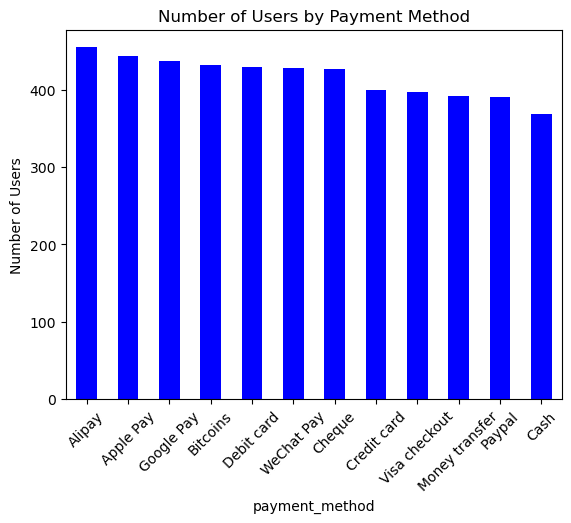

In [601]:
# Plotting
user_counts.plot(kind='bar', color='blue')
plt.xlabel('payment_method')
plt.ylabel('Number of Users')
plt.title('Number of Users by Payment Method')
plt.xticks(rotation=45)
plt.show()

## 9. How many countries are represented in the dataset? 

In [603]:
user_df['address']

0       {'city': 'Klockoshire', 'street_name': 'Stehr ...
1       {'city': 'New Richard', 'street_name': 'Glen P...
2       {'city': 'Wolfmouth', 'street_name': 'Ortiz Br...
3       {'city': 'Wisokymouth', 'street_name': 'Chong ...
4       {'city': 'Lake Robena', 'street_name': 'Wiza E...
                              ...                        
4995    {'city': 'Aufderharstad', 'street_name': 'Reic...
4996    {'city': 'Vannessafurt', 'street_name': 'Rempe...
4997    {'city': 'North Willard', 'street_name': 'Gibs...
4998    {'city': 'West Vanessa', 'street_name': 'MacGy...
4999    {'city': 'Alaneton', 'street_name': 'Nitzsche ...
Name: address, Length: 5000, dtype: object

In [604]:
user_df['address'][0]

{'city': 'Klockoshire',
 'street_name': 'Stehr Creek',
 'street_address': '725 Cameron Dale',
 'zip_code': '05595',
 'state': 'Kansas',
 'country': 'United States',
 'coordinates': {'lat': 65.38161563844506, 'lng': -106.61301751664382}}

In [605]:

# Extract country and create a new column
user_df['Country'] = user_df['address'].apply(lambda x: x.get('country'))

In [606]:
user_df['Country']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
4995    United States
4996    United States
4997    United States
4998    United States
4999    United States
Name: Country, Length: 5000, dtype: object

In [607]:
user_df['Country'].nunique()

1

In [608]:
user_df['Country'].unique()

array(['United States'], dtype=object)

so only one Country : United States

## 10. How many unique employment titles are represented in the dataset?

In [611]:
user_df['employment']

0       {'title': 'National Education Facilitator', 'k...
1       {'title': 'Dynamic Engineer', 'key_skill': 'Te...
2       {'title': 'Sales Architect', 'key_skill': 'Com...
3       {'title': 'Senior Administration Representativ...
4       {'title': 'Human Construction Designer', 'key_...
                              ...                        
4995    {'title': 'Government Supervisor', 'key_skill'...
4996    {'title': 'Chief Marketing Consultant', 'key_s...
4997    {'title': 'Product Hospitality Officer', 'key_...
4998    {'title': 'Future Consultant', 'key_skill': 'N...
4999    {'title': 'Forward Government Developer', 'key...
Name: employment, Length: 5000, dtype: object

In [612]:
user_df['employment'][0]

{'title': 'National Education Facilitator', 'key_skill': 'Proactive'}

In [613]:

# Extract employment title and create a new column
user_df['Employement_Title'] = user_df['employment'].apply(lambda x: x.get('title'))

In [614]:
user_df['Employement_Title'].unique()

array(['National Education Facilitator', 'Dynamic Engineer',
       'Sales Architect', ..., 'Chief Marketing Consultant',
       'Product Hospitality Officer', 'Forward Government Developer'],
      dtype=object)

In [615]:
user_df['Employement_Title'].nunique()

2746

# <span style="font-size: 30px; color: brown;"> Question 2 (30 pts)</span>

## <span style="font-size: 20px; color: black;"> 1. Code a web scraper that will visit https://www.isb.edu/en/study-isb/advanced-managementprogrammes.html and extract the following information about each program. (i) Title (ii)Brief description (iii) Duration (iv) Work Experience. (20 pts)

In [618]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

In [619]:
# Define the URL
url = 'https://www.isb.edu/en/study-isb/advanced-management-programmes.html'

In [620]:
# Initializing WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Opening the URL
driver.get(url)

# waiting for the page to load completely
time.sleep(5)

# Extracting program titles and descriptions as inspected the html page and found it is to be treated separately
programs = driver.find_elements(By.CSS_SELECTOR, 'div.card-detail h3')
descriptions = driver.find_elements(By.CSS_SELECTOR, 'div.card-detail h4')

# Initializing lists to store details
durations = []
work_experience = []
locations = []

# Extract program sections
program_sections = driver.find_elements(By.CSS_SELECTOR, 'div.card-detail')

for section in program_sections:
    try:
        # Extracting Duration and Work Experience which was found under same class but in different groups duration being first element
        duration_elements = section.find_elements(By.XPATH, './/div[@class="col-md-6 col-xs-6 bor-botom"]/strong')
        if len(duration_elements) >= 2:
            durations.append(duration_elements[0].text)
            work_experience.append(duration_elements[1].text)  # Work Experience is the second element
        else:
            durations.append("N/A")
            work_experience.append("N/A")

        # Extract Locations
        location_elements = section.find_elements(By.CSS_SELECTOR, 'div.col-md-12.col-xs-12 strong')
        locations.append(" | ".join([loc.text for loc in location_elements]))

    except Exception as e:
        print(f"Error extracting details for the section: {e}")

# Preparing data for JSON
data = []
for program, description, duration, work_experience, location in zip(programs, descriptions, durations, work_experience, locations):
    data.append({
        "Program Title": program.text,
        "Description": description.text,
        "Duration": duration,
        "Work Experience": work_experience,
        "Location": location
    })



# Close the browser
driver.quit()

In [621]:
# Converting to DataFrame
isb_program_data_df = pd.DataFrame(data)

# saving to CSV
isb_program_data_df.to_csv('program_details.csv', index=False)

In [622]:
isb_program_data_df

,Program Title,Description,Duration,Work Experience,Location
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Hyderabad | Mohali
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,Mohali | Hyderabad
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,Mohali and Hyderabad
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,Mohali and Hyderabad
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,Hyderabad and Mohali


In [623]:
# Renaming columns
isb_program_data_df_updated= isb_program_data_df.rename(columns={
    'Program Title': 'Title',
    'Description': 'Brief Description'
})

In [624]:
isb_program_data_df_updated=isb_program_data_df.drop(axis=1,columns='Location')

In [625]:
isb_program_data_df_updated

,Program Title,Description,Duration,Work Experience
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years


## <span style="font-size: 20px; color: black;"> 2. Create a data frame that has the following columns: Title, Description, Duration (in months),Capstone Project (Yes/No), Work Experience. Display the data frame in your notebook. (10pts)

In [627]:
isb_program_data_df

,Program Title,Description,Duration,Work Experience,Location
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Hyderabad | Mohali
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,Mohali | Hyderabad
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,Mohali and Hyderabad
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,Mohali and Hyderabad
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,Hyderabad and Mohali


In [628]:
isb_program_data_df['Duration']

0    12 months + 3 months of Capstone Project
1                                   12 months
2                                   12 months
3                                   12 months
4                                   12 months
Name: Duration, dtype: object

In [629]:
# Defining the regex pattern to extract all occurrences of months
pattern = r'(\d+) months'
# Extract the number of months
isb_program_data_df['Number_of_Months'] = isb_program_data_df['Duration'].str.findall(pattern).apply(lambda x: sum(map(float, x)))


In [630]:
isb_program_data_df

,Program Title,Description,Duration,Work Experience,Location,Number_of_Months
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Hyderabad | Mohali,15.0
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,Mohali | Hyderabad,12.0
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,Mohali and Hyderabad,12.0
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,Mohali and Hyderabad,12.0
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,Hyderabad and Mohali,12.0


In [631]:
# Defining the regex pattern to search for the word 'Capstone'
pattern = r'Capstone'
import re
# Extracting the Capstone and applying the lambda function
isb_program_data_df['Capstone Project'] = isb_program_data_df['Duration'].apply(lambda x: "Yes" if re.search(pattern, x) else "No")

In [632]:
isb_program_data_df

,Program Title,Description,Duration,Work Experience,Location,Number_of_Months,Capstone Project
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Hyderabad | Mohali,15.0,Yes
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,Mohali | Hyderabad,12.0,No
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,Mohali and Hyderabad,12.0,No
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,Mohali and Hyderabad,12.0,No
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,Hyderabad and Mohali,12.0,No


# <span style="font-size: 30px; color: brown;"> Question 3 (20 pts)</span>

## <span style="font-size: 20px; color: black;"> 1. Select a recent news/magazine article related to business analytics that interests you and make a word cloud using the template provided in the session 4 jupyter notebook. Provide the full text of thearticle in the notebook so that we can evaluate your work

### <span style="font-size: 20px; color: blue;"> article link : https://www.bcg.com/publications/2023/how-people-create-and-destroy-value-with-gen-ai </span>

### <span style="font-size: 20px; color: brown;">
Generative AI will be a powerful enabler of competitive advantage for companies that crack the code of adoption. In a first-of-its-kind scientific experiment, we found that when GenAI is used in the right way, and for the right tasks, its capabilities are such that people’s efforts to improve the quality of its output can backfire. But it isn’t obvious when the new technology is (or is not) a good fit, and the persuasive abilities of the tool make it hard to spot a mismatch. This can have serious consequences: When it is used in the wrong way, for the wrong tasks, generative AI can cause significant value destruction.

We conducted our experiment with the support of a group of scholars from Harvard Business School, MIT Sloan School of Management, the Wharton School at the University of Pennsylvania, and the University of Warwick.1 With more than 750 BCG consultants worldwide as subjects, it is the first study to test the use of generative AI in a professional-services setting—through tasks that reflect what employees do every day. The findings have critical implications across industries.

The opportunity to boost performance is astonishing: When using generative AI (in our experiment, OpenAI’s GPT-4) for creative product innovation, a task involving ideation and content creation, around 90% of our participants improved their performance. What’s more, they converged on a level of performance that was 40% higher than that of those working on the same task without GPT-4. People best captured this upside when they did not attempt to improve the output that the technology generated.

Creative ideation sits firmly within GenAI’s current frontier of competence. When our participants used the technology for business problem solving, a capability outside this frontier, they performed 23% worse than those doing the task without GPT-4. And even participants who were warned about the possibility of wrong answers from the tool did not challenge its output.

When using GPT-4 for a task within the tool’s current frontier of competence, nearly all participants improved their performance. Those who used GPT-4 for a task outside this frontier performed worse than those who didn’t use the tool.
Our findings describe a paradox: People seem to mistrust the technology in areas where it can contribute massive value and to trust it too much in areas where the technology isn’t competent. This is concerning on its own. But we also found that even if organizations change these behaviors, leaders must watch for other potential pitfalls: Our study shows that the technology’s relatively uniform output can reduce a group’s diversity of thought by 41%.

The precise magnitude of the effects we uncovered will be different in other settings. But our findings point to a crucial decision-making moment for leaders across industries. They need to think critically about the work their organization does and which tasks can benefit from or be damaged by generative AI. They need to approach its adoption as a change management effort spanning data infrastructure, rigorous testing and experimentation, and an overhaul of existing talent strategies. Perhaps most important, leaders need to continually revisit their decisions as the frontier of GenAI’s competence advances.

The Value at Stake
Our findings make clear that generative AI adoption is a double-edged sword. In our experiment, participants using GPT-4 for creative product innovation outperformed the control group (those who completed the task without using GPT-4) by 40%. But for business problem solving, using GPT-4 resulted in performance that was 23% lower than that of the control group. (See Exhibit 1.)


Learn More About GenAILearn More About GenAI
BCG-GenAI-website_homepage.jpg
Generative AI
Generative artificial intelligence is a form of AI that uses deep learning and GANs for content creation. Learn how it can disrupt or benefit businesses.
AI Hero Video
Artificial Intelligence
Scaling artificial intelligence can create a massive competitive advantage. Learn how our AI-driven initiatives have helped clients extract value.
" "
Article
Generative AI for the Public Sector: From Opportunities to Value
Generative AI will have significant positive impacts on the public sector. National, state, provincial, and local governments must begin taking actions to unlock these opportunities.
The creative product innovation task asked participants to come up with ideas for new products and go-to-market plans. The business problem-solving task asked participants to identify the root cause of a company’s challenges based on performance data and interviews with executives. (See “Our Experiment Design and Methodology.”) Perhaps somewhat counterintuitively, current GenAI models tend to do better on the first type of task; it is easier for LLMs to come up with creative, novel, or useful ideas based on the vast amounts of data on which they have been trained. Where there’s more room for error is when LLMs are asked to weigh nuanced qualitative and quantitative data to answer a complex question. Given this shortcoming, we as researchers knew that GPT-4 was likely to mislead participants if they relied completely on the tool, and not also on their own judgment, to arrive at the solution to the business problem-solving task (this task had a “right” answer).

Our Experiment Design and Methodology
We also knew that participants were capable of finding the answer to the business problem-solving task on their own: 85% of participants in the control group did so. Yet many participants who used GPT-4 for this task accepted the tool’s erroneous output at face value. It’s likely that GPT-4’s ability to generate persuasive content contributed to this result. In our informal conversations with participants, many confirmed that they found the rationale GPT-4 offered for its output very convincing (even though as an LLM, it came up with the rationale after the recommendation, rather than creating the recommendation on the basis of the rationale).

The double-edged-sword effect holds across all levels of baseline proficiency. (At the start of the experiment, participants completed a baseline task without using GPT-4 that we then graded and ranked; see the sidebar on our design and methodology). This has an important caveat: The lower the individual’s baseline proficiency, the more significant the effect tended to be; for the creative product innovation task, these individuals boosted performance by 43%. Still, the effect was material even for the top-ranked baseline performers, among whom the upside and downside of using GPT-4 on the two tasks were 17% and -17%, respectively. (See Exhibit 2.) (Throughout, our discussion of participants’ performance is not indicative of their absolute levels of competence and talents with respect to these or other tasks.)
 


The strong connection between performance and the context in which generative AI is used raises an important question about training: Can the risk of value destruction be mitigated by helping people understand how well-suited the technology is for a given task? It would be rational to assume that if participants knew the limitations of GPT-4, they would know not to use it, or would use it differently, in those situations.

Our findings suggest that it may not be that simple. The negative effects of GPT-4 on the business problem-solving task did not disappear when subjects were given an overview of how to prompt GPT-4 and of the technology’s limitations. (See “Our Use of Training in the Experiment.”)

Our Use of Training in the Experiment
Even more puzzling, they did considerably worse on average than those who were not offered this simple training before using GPT-4 for the same task. (See Exhibit 3.) This result does not imply that all training is ineffective. But it has led us to consider whether this effect was the result of participants’ overconfidence in their own abilities to use GPT-4—precisely because they’d been trained.


New Opportunities for Human Talent
Effects at the group level, like the ones discussed above, aren’t necessarily indicative of how generative AI impacts individuals. When we look behind the averages, we find that the use of GPT-4 has two distinct effects on individual performance distribution. (See Exhibit 4.) First, the entire distribution shifts to the right, toward higher levels of performance. This underscores the fact that the 40% performance boost discussed above is not a function of “positive” outliers. Nearly all participants (around 90%), irrespective of their baseline proficiency, produced higher-quality results when using GPT-4 for the creative product innovation task. Second, the variance in performance is dramatically reduced: A much higher share of our participants performed at or very close to the average level.


In other words, participants with lower baseline proficiency, when given access to generative AI, ended up nearly matching those with higher baseline proficiency. Being more proficient without the aid of technology doesn’t give one much of an edge when everyone can use GPT-4 to perform a creative product innovation task. (See Exhibit 5.) The fact that we observed this effect among our well-educated, high-achieving sample suggests that it may turn out to be even more pronounced in contexts that are more heterogenous, with a wider spread in proficiency.


Digging deeper, we find that because GPT-4 reaches such a high level of performance on the creative product innovation task, it seems that the average person is not able to improve the technology’s output. In fact, human efforts to enhance GPT-4 outputs decrease quality. (See the sidebar on our design and methodology for a description of how we measured quality.) We found that “copy-pasting” GPT-4 output strongly correlated with performance: The more a participant’s final submission in the creative product innovation task departed from GPT-4’s draft, the more likely it was to lag in quality. (See Exhibit 6.) For every 10% increase in divergence from GPT-4’s draft, participants on average dropped in the quality ranking by around 17 percentile points.


It appears that the primary locus of human-driven value creation lies not in enhancing generative AI where it is already great, but in focusing on tasks beyond the frontier of the technology’s core competencies.

Interestingly, we found that most of our participants seemed to grasp this point intuitively. In general, they did not feel threatened by generative AI; rather, they were excited by this change in their roles and embraced the idea of taking on tasks that only humans can do. As one participant observed, “I think there is a lot of value add in what we can do as humans. You need a human to adapt an answer to a business’s context; that process cannot be replaced by AI.” Another noted, “I think it’s an opportunity to do things more efficiently, to stop wasting time on things that are very repetitive and actually focus on what’s important, which is more strategic.”

However, it is worth keeping in mind the population of this study: highly skilled young knowledge workers who are more likely to be able to make this transition easily. Other professionals may feel greater fear or experience more difficulty adapting their role to the new technology.

The Creativity Trap
Even if you use GenAI in the right way, and for the right tasks, our research suggests that there are risks to creativity.


The first risk is a tradeoff between individual performance gains and collective creativity loss. Because GPT-4 provides responses with very similar meaning time and again to the same sorts of prompts, the output provided by participants who used the technology was individually better but collectively repetitive. The diversity of ideas among participants who used GPT-4 for the creative product innovation task was 41% lower compared with the group that did not use the technology. (See Exhibit 7.) People didn’t appreciably add to the diversity of ideas even when they edited GPT-4’s output.


The second risk is drawn from a sample of our interviews with participants. Roughly 70% believe that extensive use of GPT-4 may stifle their creative abilities over time. (See Exhibit 8.) As one participant explained, “Like any technology, people can rely on it too much. GPS helped navigation immensely when it was first released, but today people can’t even drive without a GPS. As people rely on a technology too much, they lose abilities they once had.” Another participant noted, “This [phenomenon] is definitely a concern for me. If I become too reliant on GPT, it will weaken my creativity muscles. This already happened to me during the experiment.” Businesses will need to be mindful of their employees’ perceptions of and attitudes about generative AI, and how those might affect their ability to drive innovation and add value.

We don’t yet have data to confirm our participants’ perceptions; this is a topic for further study. But if employees’ concerns bear out, it could compound the group-level risk. Specifically, the loss of collective diversity of ideas may be exacerbated if employees experience some atrophy of individual creativity.

The Generative AI Change Imperative
Inspired by the findings from our research, we envision a series of questions, challenges, and options that can help business leaders make generative AI adoption a source of differentiation—and, as such, an enabler of sustained competitive advantage.

Data Strategy. Any company that incorporates GenAI can realize significant efficiency gains in areas where the technology is competent. But if multiple firms apply the technology across similar sets of tasks, it can produce a leveling effect among organizations analogous to the pattern observed among participants in our experiment. As a result, one of the keys to differentiation will be the ability to fine-tune generative AI models with large volumes of high-quality, firm-specific data.

This is easier said than done. In our experience, not all companies have the advanced data infrastructure capabilities needed to process their proprietary data. Developing these capabilities has been a key focus of AI transformations, but with the arrival of generative AI, it becomes all the more important: As we have argued elsewhere, the power of GenAI often lies in the identification of unexpected—even counterintuitive—patterns and correlations. To reap these benefits, companies need a comprehensive data pipeline, combined with a renewed focus on developing internal data engineering capabilities.

Roles and Workflows. For tasks that generative AI systems have mastered—which, of course, is an ever-expanding list—people need to radically revise their mindset and their approach to work. Instead of the default assumption that technology creates a helpful first draft that requires revision, people should regard the output as a plausible final draft that they should check against firm-established guardrails but otherwise largely leave as is.

The value at stake lies not only in the promise of greater efficiency but also in the possibility for people to redirect time, energy, and effort away from tasks that generative AI will take over. Employees will be able to double down on the tasks that remain beyond the frontier of this technology, reaching higher levels of proficiency.

The value at stake lies not only in the promise of greater efficiency but also in the possibility for people to redirect time, energy, and effort away from tasks that generative AI will take over.
Turning the lens on ourselves, we can already envision our employees spending less time manually summarizing research or polishing slides and instead investing even more effort in driving complex change management initiatives. The impact of generative AI’s disruption will of course vary dramatically across job categories. But at least some workers—including the majority of our participants—are confronting this prospect with optimism.

Strategic Workforce Planning. To get the AI–human dynamics right in complex organizations, leaders must grapple with four questions that have no easy answers:

Which capabilities will you need? As with any other technology, it will take people to define what and how generative AI will be used. But it isn’t obvious which human capabilities are best suited to maximizing the tool’s value or how often these capabilities will change. We’re seeing this uncertainty play out in real time with respect to LLMs: The role of “prompt engineer” didn’t exist a year ago, but demand for this role during Q2 2023 was nearly seven times higher than it was in Q1.2 (GPT-4 was launched toward the end of Q1, on March 14, 2023.) And yet, prompt engineers may no longer be needed once generative AI itself has mastered the task of breaking down complex problems into optimal prompts (as it appears it soon will with autonomous agents). Even the selection of optimal LLMs for specific business applications, which is largely done by humans at present, may in the future be outsourced to AI systems themselves.
What is your hiring strategy? Because generative AI is a great leveler of proficiency on certain tasks, raw talent may not be a good predictor of high performance in a world of widespread GenAI use. For example, some people may have lower baseline proficiency for a type of task while being quite capable of partnering with generative AI to outperform peers. Finding these individuals will be an important goal for future talent strategies, but the underlying traits are not yet clearly identified.
How will you train people effectively? As our findings indicate, straightforward training won’t be sufficient. Effective training will likely need to explicitly address any cognitive biases that may lead people to over-rely on generative AI in situations where the technology has not yet reached the right level of competence.

We also see a potentially deeper issue: Even as certain tasks are fully handed over to GenAI, some degree of human oversight will be necessary. How can employees effectively manage the technology for tasks that they themselves have not learned how to do on their own?

How will you cultivate diversity of thought? Our results suggest that GenAI detracts from collective creativity by limiting the range of perspectives that individuals bring to the table. This loss in diversity of thought may have ripple effects beyond what we can currently envision. One plausible risk is that it could shrink the long-term innovation capacity of organizations—for example, by making ideation more homogenous. It’s a slippery slope, as a decline in innovation capabilities means less differentiation from competitors, which could impede growth potential. The good news is that the ideas that humans generate on their own and the ideas that they generate when assisted by generative AI are vastly different. Setting aside the degree of diversity in each group, when we compared the output of the control and experimental groups, the overlap (semantic similarity) was less than 10%. The key for leaders will be to use both approaches to ideation—which ultimately will create an even wider circle of ideas.
Experimentation and Testing. Generative AI systems continue to develop at a stunning rate: In just the few months between the releases of OpenAI’s GPT-3.5 and GPT-4, the model made huge performance leaps across a wide range of tasks. Tasks for which generative AI is ill-suited today will likely fall within its frontier of competence soon—perhaps in the very near future. This is likely to happen as LLMs become multi-modal (going beyond text to include other formats of data), or as models grow larger, both of which increase the likelihood of unpredictable capabilities.

Given this lack of predictability, the only way to understand how generative AI will impact your business is to develop experimentation capabilities—to establish a “generative AI lab” of sorts that will enable you to keep pace with an expanding frontier. And as the technology changes, the collaboration model between humans and generative AI will have to change as well. Experimentation may yield some counterintuitive or even uncomfortable findings about your business, but it will also enable you to gain invaluable insights about how the technology can and should be used. We put our feet to the fire with this experiment—and we believe all business leaders should do the same.

Generative AI will likely change much of what we do and how we do it, and it will do so in ways that no one can anticipate. Success in the age of AI will largely depend on an organization’s ability to learn and change faster than it ever has before.

In addition to the collaborators from the academic team listed above, the authors would like to thank Clément Dumas, Gaurav Jha, Leonid Zhukov, Max Männig, and Maxime Courtaux for their helpful comments and suggestions. The authors would also like to thank Lebo Nthoiwa, Patrick Healy, Saud Almutairi, and Steven Randazzo for their efforts interviewing the experiment participants. The authors also thank all their BCG colleagues who volunteered to participate in this experiment </span>

In [637]:
#importing necessary libraries
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [638]:
# Importing txt file
with open("genaibcg.txt", 'r', encoding='utf-8') as file:
    genaibcg = file.read()

In [639]:
genaibcg

'Generative AI will be a powerful enabler of competitive advantage for companies that crack the code of adoption. In a first-of-its-kind scientific experiment, we found that when GenAI is used in the right way, and for the right tasks, its capabilities are such that people’s efforts to improve the quality of its output can backfire. But it isn’t obvious when the new technology is (or is not) a good fit, and the persuasive abilities of the tool make it hard to spot a mismatch. This can have serious consequences: When it is used in the wrong way, for the wrong tasks, generative AI can cause significant value destruction.\n\nWe conducted our experiment with the support of a group of scholars from Harvard Business School, MIT Sloan School of Management, the Wharton School at the University of Pennsylvania, and the University of Warwick.1 With more than 750 BCG consultants worldwide as subjects, it is the first study to test the use of generative AI in a professional-services setting—throug

In [640]:
# Tokenizing the text
tokens = nltk.word_tokenize(genaibcg)

# Keeping only the tokens that are alphabetic and convert all to lower case
tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep only alphabetic tokens

# Removing stop words
tokens = [word for word in tokens if word not in stopwords.words('english')]


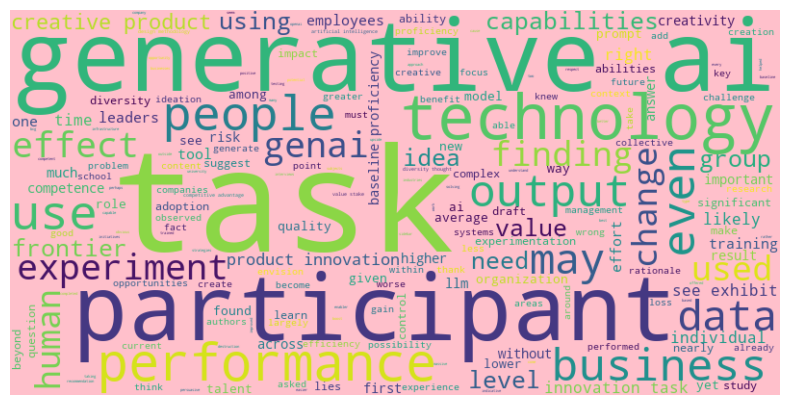

In [641]:
# Joining tokens to recreate the text as a single string
cleaned_text = ' '.join(tokens)

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='pink').generate(cleaned_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


## <span style="font-size: 20px; color: black;"> 2. Do the prominent words in the word cloud correspond to the gist of the article? What do you observe?(10 pts)

The article explores the impact of generative AI (GenAI), specifically OpenAI's GPT-4, on performance in different tasks.Generative AI can provide a significant competitive advantage when used correctly. A study involving over 750 consultants found that GPT-4 boosted performance by 40% in creative tasks but decreased performance by 23% in business problem-solving. The technology excels in generating creative ideas but struggles with complex problem-solving

so by looking at the word cloud, it is seen that it is highlighting the words like Generative AI, Task, Performance , Techonolgy, Business,People,Change etc

# <span style="font-size: 30px; color: brown;"> Question 4 (35 pts)</span>

Import the ISB_video_data.parquet file. This file contains information scraped from the videos on the
ISB youtube channel. Use the data to answer the following questions:

## <span style="font-size: 20px; color: black;"> 1. Parse the data and create the following columns: (i) Title (ii) Views (iii) Years since posted (15 pts)

In [648]:
import nltk
import numpy as np
import pandas as pd
import json

In [649]:
# Loading the quotes file
isb_video = pd.read_parquet('ISB_video_data.parquet')

In [650]:
isb_video.head()

,0
0,‘Educating women can solve most problems’: Pun...
1,"Microfinance still considered exploitative, bu..."
2,Accounting Research as Bayesian Inference to t...
3,Does Labor Composition Impact the Transmission...
4,Perilous and Unaccountable: The Positive Relat...


In [651]:
isb_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       883 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [652]:
isb_video.columns

Index([0], dtype='int64')

In [653]:
isb_video.columns = ['data']

In [654]:
isb_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    883 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [655]:
#checking mutiple entries to understand the pattern
isb_video['data'][0]

'‘Educating women can solve most problems’: Punjab IAS officer on gender and policy by Indian School of Business 72 views 1 day ago 12 minutes, 41 seconds'

In [656]:
import pandas as pd
import re
from datetime import datetime

In [657]:
# Defining the extraction function
def extract_details(entry):
    # Patterns to extract title/description and other details
    title_description_pattern = re.compile(r"^(.*?)(?=\s\d[\d,]*\sviews)")
    views_pattern = re.compile(r"(\d[\d,]*)\s*views")
    
    # Patterns for different time units
    years_pattern = re.compile(r"(\d+)\s*(?:year|years?)\s*ago")
    days_pattern = re.compile(r"(\d+)\s*(?:day|days?)\s*ago")
    minutes_pattern = re.compile(r"(\d+)\s*(?:minute|minutes?)")
    seconds_pattern = re.compile(r"(\d+)\s*(?:second|seconds?)")

    # Apply patterns
    title_description_match = title_description_pattern.search(entry)
    views_match = views_pattern.search(entry)
    years_match = years_pattern.search(entry)
    days_match = days_pattern.search(entry)
    minutes_match = minutes_pattern.search(entry)
    seconds_match = seconds_pattern.search(entry)
    
    # Extract title/description
    if title_description_match:
        title_description = title_description_match.group(1).strip()
        # Check for colon to split title and description
        if ':' in title_description:
            title, description = title_description.split(':', 1)
            title = title.strip()
            description = description.strip()
        else:
            title = title_description
            description = None
    else:
        title = None
        description = None

    # Extract views
    views = views_match.group(1).replace(',', '') if views_match else None
    
    # Extract years, days, minutes, seconds
    years = years_match.group(1) if years_match else None
    days = days_match.group(1) if days_match else None
    minutes = minutes_match.group(1) if minutes_match else None
    seconds = seconds_match.group(1) if seconds_match else None

    return pd.Series([title, description, views, years, days, minutes, seconds], 
                     index=['Title', 'Description', 'Views', 'Years Ago', 'Days Ago', 'Minutes', 'Seconds'])


# Apply the extraction function
isb_video[['Title', 'Description', 'Views', 'Years Ago', 'Days Ago', 'Minutes', 'Seconds']] = isb_video['data'].apply(extract_details)




In [658]:
isb_video.head(3)

,data,Title,Description,Views,Years Ago,Days Ago,Minutes,Seconds
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’,Punjab IAS officer on gender and policy by Ind...,72,None,1,12,41
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...","Sa-Dhan CEO, Jiji Mammen by Indian School of B...",292,None,8,21,None
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,None,132,None,12,5,31


In [659]:
isb_video.tail()

,data,Title,Description,Views,Years Ago,Days Ago,Minutes,Seconds
878,Michael Dell at ISB by Indian School of Busine...,Michael Dell at ISB by Indian School of Business,None,5851,15,None,1,9
879,Thomas Friedman on Globalisation 3.0 by Indian...,Thomas Friedman on Globalisation 3.0 by Indian...,None,27247,15,None,2,24
880,Professor John Mullins talking about Entrepren...,Professor John Mullins talking about Entrepren...,None,2559,15,None,4,22
881,George Bush visit to ISB by Indian School of B...,George Bush visit to ISB by Indian School of B...,None,11828,15,None,2,1
882,ISB Song by our Alumni by Indian School of Bus...,ISB Song by our Alumni by Indian School of Bus...,None,9473,15,None,1,17


In [660]:
isb_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         883 non-null    object
 1   Title        883 non-null    object
 2   Description  142 non-null    object
 3   Views        883 non-null    object
 4   Years Ago    813 non-null    object
 5   Days Ago     7 non-null      object
 6   Minutes      829 non-null    object
 7   Seconds      611 non-null    object
dtypes: object(8)
memory usage: 55.3+ KB


In [661]:
isb_video_cleaned = isb_video[['Title', 'Views', 'Years Ago']]


In [662]:
# Renaming columns
isb_video_cleaned= isb_video_cleaned.rename(columns={
    'Years Ago': 'Years Since Posted'
})

In [663]:
#for Simplicity not conversting days,minutes,seconds to Years
isb_video_cleaned.tail(3)

,Title,Views,Years Since Posted
880,Professor John Mullins talking about Entrepren...,2559,15
881,George Bush visit to ISB by Indian School of B...,11828,15
882,ISB Song by our Alumni by Indian School of Bus...,9473,15


## <span style="font-size: 20px; color: black;"> 2. Create a scatterplot to show views as a function of the years since posted. What do you observe? (10pts)

In [665]:
isb_video['Views'] = isb_video['Views'].str.replace(',', '').astype(int)

In [666]:
isb_video_filtered = isb_video[isb_video['Years Ago'].notna()]

In [667]:
isb_video_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 70 to 882
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         813 non-null    object
 1   Title        813 non-null    object
 2   Description  104 non-null    object
 3   Views        813 non-null    int64 
 4   Years Ago    813 non-null    object
 5   Days Ago     0 non-null      object
 6   Minutes      761 non-null    object
 7   Seconds      574 non-null    object
dtypes: int64(1), object(7)
memory usage: 57.2+ KB


In [668]:
813/883

0.9207248018120046

92% of the videos or posted over a year ago

In [670]:
isb_video_filtered['Years Ago'] = isb_video_filtered['Years Ago'].str.replace(',', '').astype(int)

/var/folders/j2/t5mxrmm547zgjm9ll39d5ljw0000gn/T/ipykernel_83141/495744872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isb_video_filtered['Years Ago'] = isb_video_filtered['Years Ago'].str.replace(',', '').astype(int)


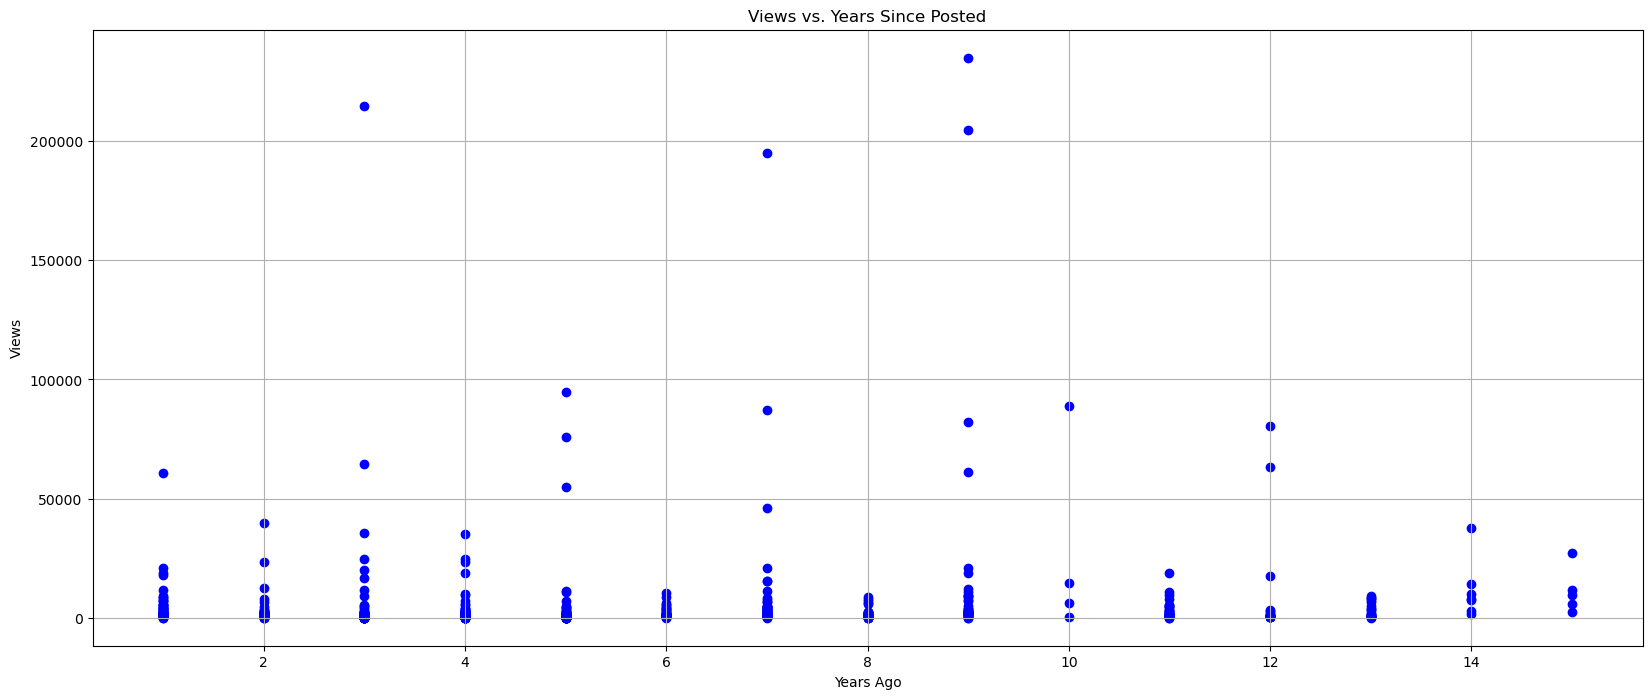

In [671]:
# Create a DataFrame

# Create a scatterplot
plt.figure(figsize=(20, 8))
plt.scatter(isb_video_filtered['Years Ago'], isb_video_filtered['Views'], color='blue')
plt.title('Views vs. Years Since Posted')
plt.xlabel('Years Ago')
plt.ylabel('Views')
plt.grid(True)
plt.show()

This helps me in understanding the correlation between years since posted and no of views

* Trend: There nare no as such visible trends, such as more views for videos posted recently or older videos having fewer views
* Outliers: There are few videos with exceptionally high views compared to the general trend
* Clusters: There are clusters of data points that are indicating different categories or types of videos

## <span style="font-size: 20px; color: black;"> 3. What other question do you want to answer using this dataset? Pose a question that interests you and answer it using your analysis. (10 pts)

In [675]:
isb_video.head(3)

,data,Title,Description,Views,Years Ago,Days Ago,Minutes,Seconds
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’,Punjab IAS officer on gender and policy by Ind...,72,None,1,12,41
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...","Sa-Dhan CEO, Jiji Mammen by Indian School of B...",292,None,8,21,None
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,None,132,None,12,5,31


In [676]:
# Calculating the correlation between 'Years Ago' and 'Views'
correlation = isb_video[['Years Ago', 'Views']].corr().iloc[0, 1]

In [677]:
correlation

0.08931549065180319

so not highly correlated

In [679]:
isb_video_filtered_2=isb_video[isb_video['Years Ago'].isna()]

In [680]:
isb_video_filtered_2.tail(3)

,data,Title,Description,Views,Years Ago,Days Ago,Minutes,Seconds
67,"Isaac Rajkumar and Anurag Gupta, PGPMAX Co ’12...","Isaac Rajkumar and Anurag Gupta, PGPMAX Co ’12...",None,204,None,None,3,6
68,Professor Sarang Deo | Giving to ISB by Indian...,Professor Sarang Deo | Giving to ISB by Indian...,None,534,None,None,3,29
69,Policy Talks S1Ep1: The Thin Khaki Line | Manj...,Policy Talks S1Ep1,"The Thin Khaki Line | Manjari Jaruhar, Bihar's...",621,None,None,15,None


In [681]:
isb_video_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         70 non-null     object
 1   Title        70 non-null     object
 2   Description  38 non-null     object
 3   Views        70 non-null     int64 
 4   Years Ago    0 non-null      object
 5   Days Ago     7 non-null      object
 6   Minutes      68 non-null     object
 7   Seconds      37 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.9+ KB


In [682]:
isb_video_filtered_3 = isb_video_filtered_2[isb_video_filtered_2['Days Ago'].notna()]

In [683]:
isb_video_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         70 non-null     object
 1   Title        70 non-null     object
 2   Description  38 non-null     object
 3   Views        70 non-null     int64 
 4   Years Ago    0 non-null      object
 5   Days Ago     7 non-null      object
 6   Minutes      68 non-null     object
 7   Seconds      37 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.9+ KB


* so it shows that Days are not a very significant angle to check and we can focus on Years , Views or any categorical data

In [685]:
isb_video.head(3)

,data,Title,Description,Views,Years Ago,Days Ago,Minutes,Seconds
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’,Punjab IAS officer on gender and policy by Ind...,72,None,1,12,41
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...","Sa-Dhan CEO, Jiji Mammen by Indian School of B...",292,None,8,21,None
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,None,132,None,12,5,31


In [686]:
#we can check histogram for Views to understand the distribution

In [687]:
# Assuming 'isb_video' DataFrame is already defined and 'Views' column exists
Q1 = isb_video['Views'].quantile(0.25)
Q3 = isb_video['Views'].quantile(0.75)

In [688]:
Q1

320.5

In [689]:
Q3

2192.0

In [690]:
IQR = Q3 - Q1

In [691]:
IQR

1871.5

In [692]:
# Defining outliers as those outside 1.5*IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [693]:
lower_bound

-2486.75

In [694]:
upper_bound

4999.25

In [695]:
# Filtering out outliers
filtered_df = isb_video[(isb_video['Views'] >= lower_bound) & (isb_video['Views'] <= upper_bound)]

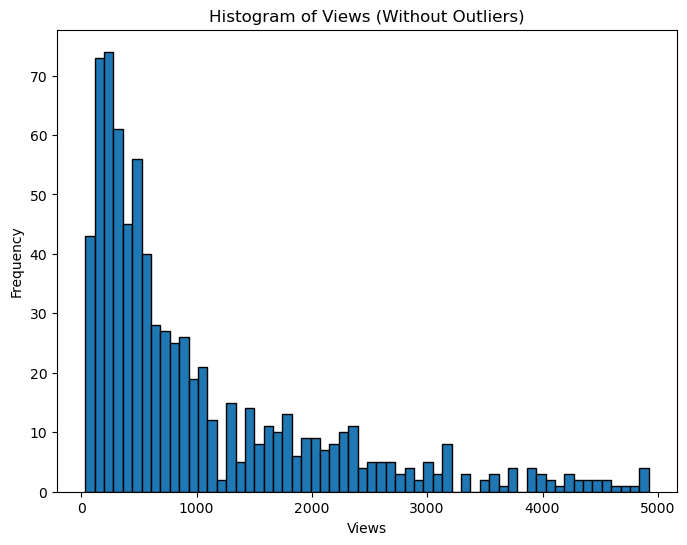

In [696]:

#histogram of views
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['Views'], bins=60, edgecolor='black')
plt.title('Histogram of Views (Without Outliers)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()


so right skewed distribution

# <span style="font-size: 30px; color: brown;"> Question 5 (40 pts)</span>

Import the quotes_sentiment_data.parquet file. This file has sentiment scores generated for 1000
random quotes. The scores column is the sentiment score from the NLTK VADER module. The
sentiment column has score from the stanza package.

In [700]:
# Loading the quotes file
quotes = pd.read_parquet('quotes_sentiment_data.parquet')

In [701]:
quotes.head(3)

,quote,scores,sentiment
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"


## <span style="font-size: 20px; color: black;"> 1. Rename the columns to reflect the method used. (5 pts)

In [703]:
quotes.columns

Index(['quote', 'scores', 'sentiment'], dtype='object')

In [704]:
# Rename columns
quotes= quotes.rename(columns={
    'scores': 'NLTK_VADER_scores',
    'sentiment': 'Stanza_sentiment'
})

In [705]:
quotes.columns

Index(['quote', 'NLTK_VADER_scores', 'Stanza_sentiment'], dtype='object')

In [706]:
quotes

,quote,NLTK_VADER_scores,Stanza_sentiment
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0]
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]"
...,...,...,...
10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]"
14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1]
2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1]
9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0]


## <span style="font-size: 20px; color: black;"> 2. Parse out the compound score from the VADER method and put it in a new column. (10 pts)

In [708]:
quotes['NLTK_VADER_scores']

11021    {'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...
14034    {'compound': -0.25, 'neg': 0.238, 'neu': 0.559...
604      {'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...
2046     {'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...
19155    {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...
                               ...                        
10374    {'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...
14398    {'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...
2928     {'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...
9416     {'compound': -0.872, 'neg': 0.365, 'neu': 0.63...
21228    {'compound': -0.6597, 'neg': 0.204, 'neu': 0.7...
Name: NLTK_VADER_scores, Length: 1000, dtype: object

In [709]:
import re
# Defining a regex pattern to extract the compound value

pattern = r"'compound':\s*(-?\d+\.\d+)"

# Function to apply regex and extract the compound value
def extract_compound(text):
    match = re.search(pattern, text)
    if match:
        return float(match.group(1))
    return None

In [710]:
# Extracting compound values from dictionaries and creating a new column
quotes['compound'] = quotes['NLTK_VADER_scores'].apply(lambda x: x.get('compound'))

In [711]:
quotes.head(3)

,quote,NLTK_VADER_scores,Stanza_sentiment,compound
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2],0.2263
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]",-0.2500
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]",0.9567


## <span style="font-size: 20px; color: black;"> 3. The sentiment score for each quote generated by stanza has several numbers, one for each sentence. Create an average score by averaging over all sentences. Create a new column to store the averagescore. (10 pts)

In [713]:
type(quotes['Stanza_sentiment'])

pandas.core.series.Series

In [714]:
# Creating a Function to compute the average of a list
def average_sentiment(scores):
    if scores:
        return sum(scores) / len(scores)
    return None


In [715]:
# Applying the function to compute the average sentiment score
quotes['average_score'] = quotes['Stanza_sentiment'].apply(lambda x: average_sentiment(x.tolist()))

In [716]:
quotes.tail(8)

,quote,NLTK_VADER_scores,Stanza_sentiment,compound,average_score
466,Don't walk through life just playing football....,"{'compound': 0.6597, 'neg': 0.0, 'neu': 0.849,...","[1, 1, 0, 1]",0.6597,0.75
5156,Reading brings us unknown friends,"{'compound': 0.4767, 'neg': 0.0, 'neu': 0.563,...",[2],0.4767,2.00
25318,What good has impatience ever brought? It has ...,"{'compound': -0.6908, 'neg': 0.313, 'neu': 0.5...","[1, 0]",-0.6908,0.50
10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]",-0.4767,0.50
14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1],0.0516,1.00
2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1],0.5927,1.00
9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0],-0.8720,0.00
21228,"That’s the duty of the old, to be anxious on b...","{'compound': -0.6597, 'neg': 0.204, 'neu': 0.7...","[0, 0]",-0.6597,0.00


## <span style="font-size: 20px; color: black;"> 4. Let us examine if the two methods are consistent in scoring the sentiment. Make a scatterplot of VADER compound score against the average stanza score. What would you expect if the two methods are consistent? What do you observe? What is your conclusion? 

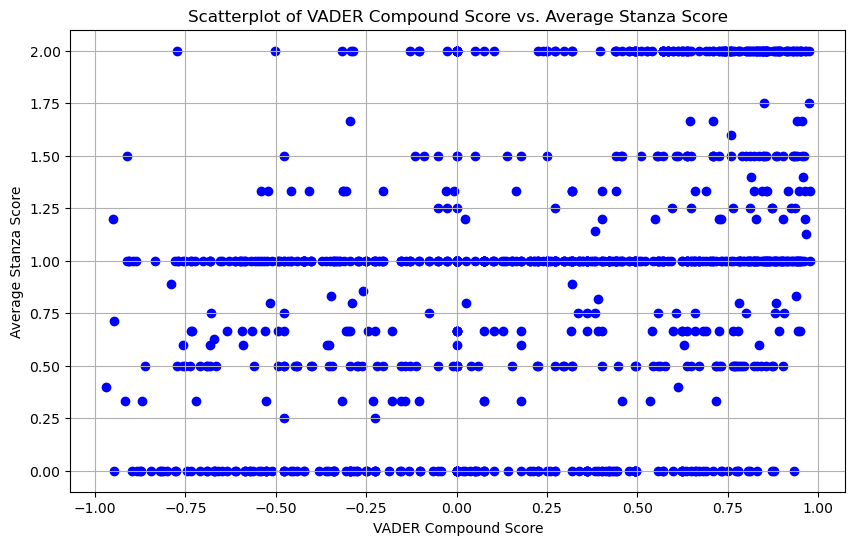

In [718]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(quotes['compound'], quotes['average_score'], color='blue')
plt.title('Scatterplot of VADER Compound Score vs. Average Stanza Score')
plt.xlabel('VADER Compound Score')
plt.ylabel('Average Stanza Score')
plt.grid(True)
plt.show()


In [719]:
# Calculating the correlation between 'Years since posted' and 'Views'
correlation = quotes[['compound', 'average_score']].corr().iloc[0, 1]
#print(f"Correlation between Years Since Posted and Views: {correlation:.2f}")

In [720]:
correlation

0.3783011496498422

would have expected a higher value of correlation if both the methods are consistent 

# <span style="font-size: 30px; color: brown;"> Question 6 (45 pts)</span>


Import the file office_iot.csv. We will only use data for the single day, February 5, 2015 for this
question.

In [724]:
import pandas as pd
office_iot=pd.read_csv('office_iot.csv')

In [725]:
office_iot.tail()

,date,Temperature,Humidity,Light,CO2,Occupancy
20555,2/18/2015 9:15,20.815,27.7175,429.75,1505.25,1
20556,2/18/2015 9:16,20.865,27.7450,423.50,1514.50,1
20557,2/18/2015 9:16,20.890,27.7450,423.50,1521.50,1
20558,2/18/2015 9:17,20.890,28.0225,418.75,1632.00,1
20559,2/18/2015 9:19,21.000,28.1000,409.00,1864.00,1


In [726]:
office_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         20560 non-null  object 
 1   Temperature  20560 non-null  float64
 2   Humidity     20560 non-null  float64
 3   Light        20560 non-null  float64
 4   CO2          20560 non-null  float64
 5   Occupancy    20560 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 963.9+ KB


## <span style="font-size: 20px; color: black;"> 1. Create the dataframe with data from February 5, 2015. (5 pts)

In [728]:
# Converting 'Date' column to datetime format
office_iot['date'] = pd.to_datetime(office_iot['date'],dayfirst=False)

In [729]:
office_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20560 non-null  datetime64[ns]
 1   Temperature  20560 non-null  float64       
 2   Humidity     20560 non-null  float64       
 3   Light        20560 non-null  float64       
 4   CO2          20560 non-null  float64       
 5   Occupancy    20560 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 963.9 KB


In [730]:
office_iot.head(3)

,date,Temperature,Humidity,Light,CO2,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.200000,749.200000,1
1,2015-02-02 14:19:00,23.718,26.290,578.400000,760.400000,1
2,2015-02-02 14:21:00,23.730,26.230,572.666667,769.666667,1


In [731]:
office_iot['date'].dt.date

0        2015-02-02
1        2015-02-02
2        2015-02-02
3        2015-02-02
4        2015-02-02
            ...    
20555    2015-02-18
20556    2015-02-18
20557    2015-02-18
20558    2015-02-18
20559    2015-02-18
Name: date, Length: 20560, dtype: object

In [732]:
office_iot['date'].dt.month.nunique()

1

In [733]:
office_iot['date'].dt.date.nunique()

17

In [734]:
office_iot['date'].dt.date.unique()

array([datetime.date(2015, 2, 2), datetime.date(2015, 2, 3),
       datetime.date(2015, 2, 4), datetime.date(2015, 2, 5),
       datetime.date(2015, 2, 6), datetime.date(2015, 2, 7),
       datetime.date(2015, 2, 8), datetime.date(2015, 2, 9),
       datetime.date(2015, 2, 10), datetime.date(2015, 2, 11),
       datetime.date(2015, 2, 12), datetime.date(2015, 2, 13),
       datetime.date(2015, 2, 14), datetime.date(2015, 2, 15),
       datetime.date(2015, 2, 16), datetime.date(2015, 2, 17),
       datetime.date(2015, 2, 18)], dtype=object)

In [735]:
# Defining the filter date
filter_date = pd.to_datetime('2015-02-05')

In [736]:
filter_date.date

<bound method Timestamp.date of Timestamp('2015-02-05 00:00:00')>

In [737]:
filter_date.date()

datetime.date(2015, 2, 5)

In [738]:
Feb5_data = office_iot[office_iot['date'].dt.date == filter_date.date()]

In [739]:
Feb5_data.head(3)

,date,Temperature,Humidity,Light,CO2,Occupancy
3034,2015-02-05 00:00:00,21.245,25.245,0.0,456.500000,0
3035,2015-02-05 00:01:00,21.245,25.245,0.0,458.500000,0
3036,2015-02-05 00:02:00,21.260,25.260,0.0,459.666667,0


In [740]:
Feb5_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 3034 to 4473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1440 non-null   datetime64[ns]
 1   Temperature  1440 non-null   float64       
 2   Humidity     1440 non-null   float64       
 3   Light        1440 non-null   float64       
 4   CO2          1440 non-null   float64       
 5   Occupancy    1440 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 78.8 KB


In [741]:
#making date values as index
Feb5_data.set_index('date', inplace=True)


In [742]:
Feb5_data.head(3)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-05 00:00:00,21.245,25.245,0.0,456.500000,0
2015-02-05 00:01:00,21.245,25.245,0.0,458.500000,0
2015-02-05 00:02:00,21.260,25.260,0.0,459.666667,0


## <span style="font-size: 20px; color: black;"> 2. Create a bar plot that shows the average temperature when room is occupied and when it is not occupied. Write your observations from the bar plot. (10 pts)

In [744]:
Feb5_data.describe()

,Temperature,Humidity,Light,CO2,Occupancy
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,21.469044,24.189298,196.227928,685.939508,0.374306
std,0.692106,2.397053,232.265713,266.427567,0.484111
min,20.200000,19.245000,0.000000,428.000000,0.000000
25%,20.890000,22.700000,0.000000,449.000000,0.000000
50%,21.200000,24.600000,0.000000,503.000000,0.000000
75%,22.200000,26.146250,447.083333,1002.062500,1.000000
max,22.890000,28.500000,744.000000,1139.000000,1.000000


In [745]:
Feb5_data['Occupancy'].unique()

array([0, 1])

In [746]:
average_temp = Feb5_data.groupby('Occupancy')['Temperature'].mean()

In [747]:
average_temp

Occupancy
0    21.094461
1    22.095203
Name: Temperature, dtype: float64

In [748]:
import matplotlib.pyplot as plt

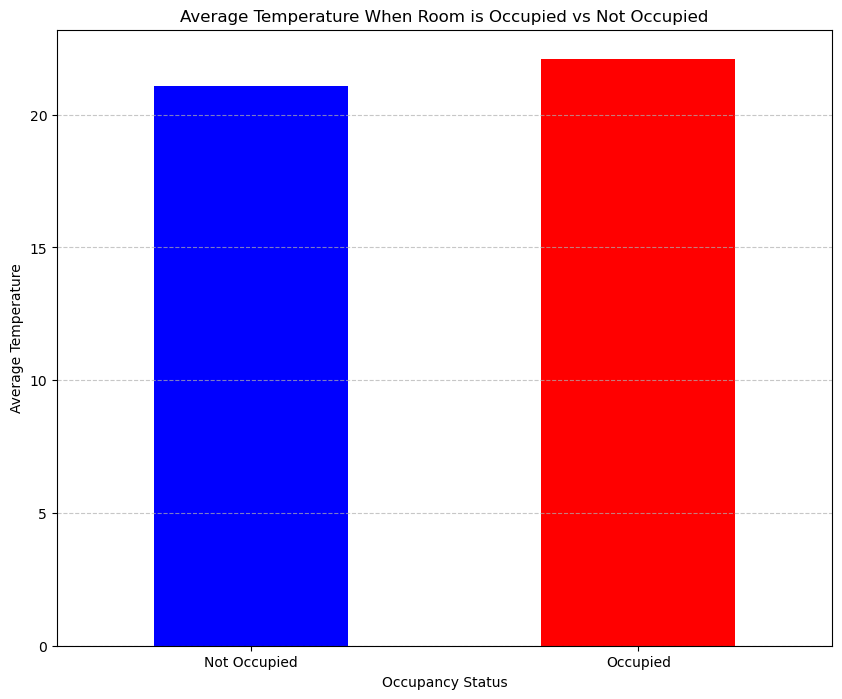

In [749]:
# Create a bar plot
plt.figure(figsize=(10, 8))
average_temp.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Occupancy Status')
plt.ylabel('Average Temperature')
plt.title('Average Temperature When Room is Occupied vs Not Occupied')
plt.xticks(ticks=[0, 1], labels=['Not Occupied', 'Occupied'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Obervation : Average temperature of the room is higher when it is occupied

## <span style="font-size: 20px; color: black;"> 3. Repeat above with average humidity. (10 pts)

In [752]:
average_humidity = Feb5_data.groupby('Occupancy')['Humidity'].mean()

In [753]:
average_humidity

Occupancy
0    23.058707
1    26.079209
Name: Humidity, dtype: float64

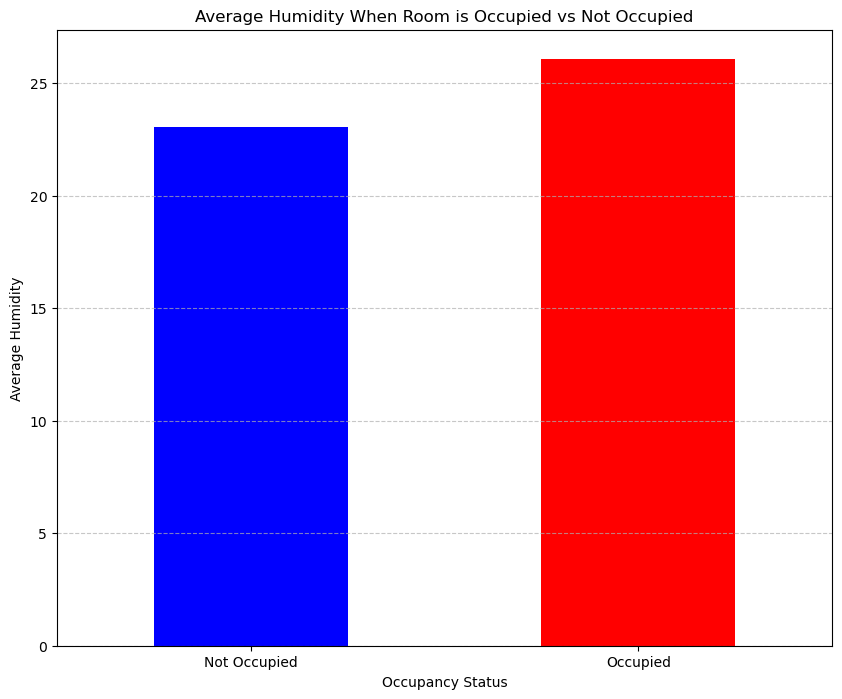

In [754]:
# Create a bar plot
plt.figure(figsize=(10, 8))
average_humidity.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Occupancy Status')
plt.ylabel('Average Humidity')
plt.title('Average Humidity When Room is Occupied vs Not Occupied')
plt.xticks(ticks=[0, 1], labels=['Not Occupied', 'Occupied'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Obervation : Average Humidity of the room is higher when it is occupied

## <span style="font-size: 20px; color: black;"> 4. With average Light. (10 pts)

In [757]:
average_Light = Feb5_data.groupby('Occupancy')['Light'].mean()

In [758]:
average_Light

Occupancy
0     36.916408
1    462.535312
Name: Light, dtype: float64

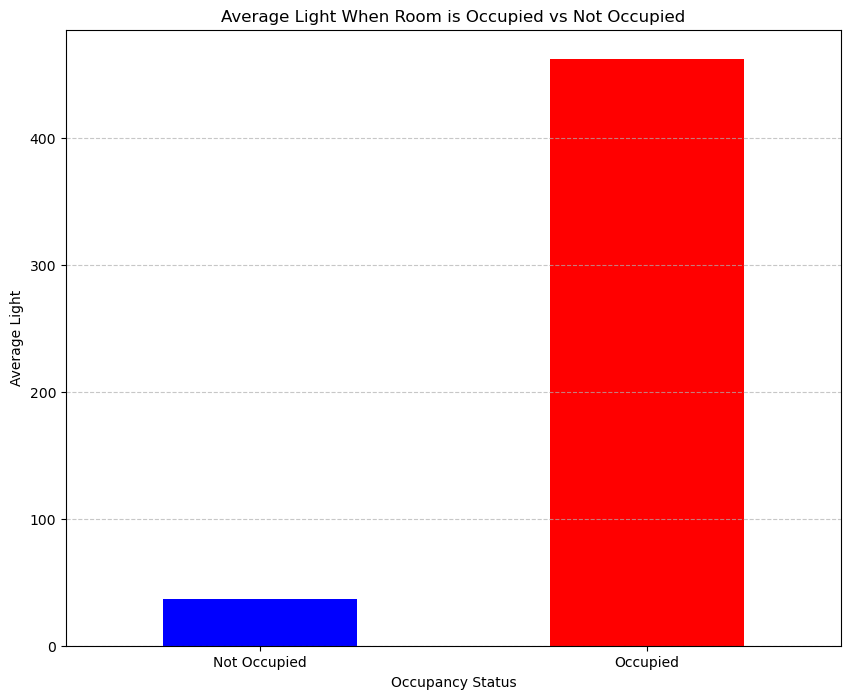

In [759]:
# Create a bar plot
plt.figure(figsize=(10, 8))
average_Light.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Occupancy Status')
plt.ylabel('Average Light')
plt.title('Average Light When Room is Occupied vs Not Occupied')
plt.xticks(ticks=[0, 1], labels=['Not Occupied', 'Occupied'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Obervation : Average Light is over 400 when the room is occupied

## <span style="font-size: 20px; color: black;"> 5. With average CO2. (10 pts)

In [762]:
average_CO2 = Feb5_data.groupby('Occupancy')['CO2'].mean()

In [763]:
average_CO2

Occupancy
0    518.374676
1    966.043244
Name: CO2, dtype: float64

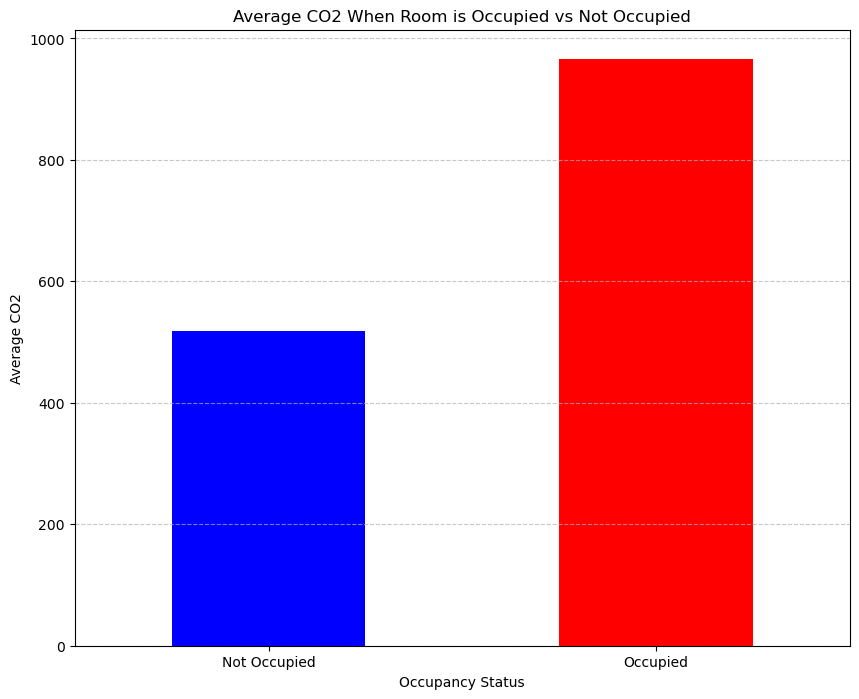

In [764]:
# Create a bar plot
plt.figure(figsize=(10, 8))
average_CO2.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Occupancy Status')
plt.ylabel('Average CO2')
plt.title('Average CO2 When Room is Occupied vs Not Occupied')
plt.xticks(ticks=[0, 1], labels=['Not Occupied', 'Occupied'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Obervation : Average CO2 is higher when the room is occupied